In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("NCI60_X.csv")

In [3]:
data.shape

(64, 6831)

In [4]:
data.head(6)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
5,V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.770000,...,-0.590019,0.000000,-0.740000,-2.095000,-1.390020,-0.400000,0.699990,0.290000,0.550000,0.000000


In [5]:
data=data.drop('Unnamed: 0',axis=1)

# HC clustering before applying PCA

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [7]:
mergings = linkage(data, method = "complete")

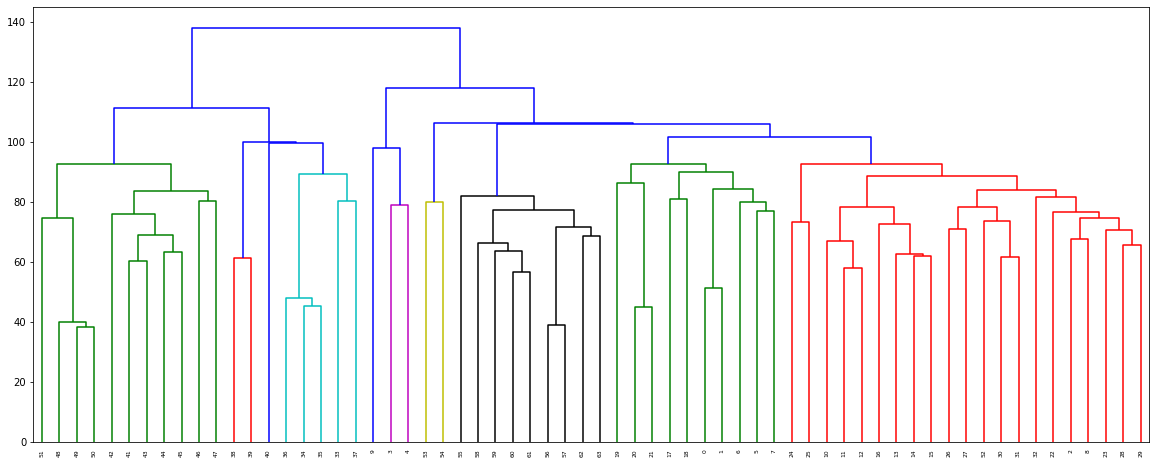

In [8]:
plt.figure(figsize=(20,8))
dendrogram(mergings)
plt.show()

In [9]:
labels = fcluster(mergings, 130, criterion='distance')
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [10]:
data['hc_clusters'] = labels
data

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,2
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,2
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,2
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,2
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,2
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275020,...,0.200000,0.290000,-0.035000,0.279980,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,2
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779981,0.390000,0.000000,0.160000,2.030000,3.940000,2
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,-0.420000,-0.460000,-0.855000,-0.160019,-0.350000,-0.360010,-0.490000,0.010000,-1.720000,2


# PCA

In [46]:
from sklearn.decomposition import PCA
pc = PCA(n_components=50)
pc_array = pc.fit_transform(data)

In [47]:
pc_array.shape

(64, 50)

In [48]:
data_pca = pd.DataFrame(pc_array, columns= ['PC'+str(i) for i in range(1,51)])

In [49]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-19.798005,-0.116787,5.968825,4.753230,4.884083,18.920461,-13.224784,18.039055,-18.625299,-7.342936,...,-0.888394,6.346829,2.448481,-2.059202,-1.947639,1.616418,-0.715691,-1.448058,3.720702,5.179350
1,-21.548412,1.455699,9.019456,6.767933,2.249123,17.067269,-13.029961,21.326749,-22.115048,-15.272546,...,-3.668713,1.277188,-2.369233,2.425393,2.986512,2.795536,-4.392258,-5.969054,-3.750232,1.274778
2,-25.057486,-1.528649,6.959444,2.785831,10.822850,16.452682,-5.278968,1.430540,-5.708826,0.376291,...,4.382764,2.185374,-12.624260,7.485643,-8.116554,-10.800123,-1.686207,16.811912,2.951217,-6.623304
3,-37.409232,11.384816,5.406614,15.441905,16.018423,33.096293,-4.558469,0.873979,4.985925,-3.653884,...,-0.668415,-6.399298,11.031067,8.291689,1.474391,0.429602,-5.096672,-2.935138,-4.822112,-9.712493
4,-50.215514,1.339652,17.599353,15.099646,13.859899,16.951757,-11.521133,-22.154691,18.938059,7.634024,...,-4.611738,8.615100,-3.133820,-10.431895,2.884919,-0.499623,-3.475395,-1.588469,-1.286527,5.138862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-15.452064,44.163262,-14.930986,-8.057833,-1.593985,-5.827618,3.386073,-0.218199,18.538179,-4.818899,...,4.881814,-5.283102,-9.598026,-7.199133,5.318286,-9.416101,5.268683,-6.690508,-2.241001,-8.228672
60,-1.932687,35.329293,-11.411210,-0.207917,2.191313,-4.189731,0.892521,3.653827,11.909286,-0.509146,...,-0.536798,4.954943,-5.188060,5.391362,5.064680,1.698977,-1.656633,5.961766,-6.231294,1.974520
61,-14.364834,33.290529,-14.764469,-0.384617,2.374498,-1.012552,-0.200301,0.338852,6.864700,1.359126,...,0.413783,11.435269,1.653075,1.762534,0.094780,8.079644,-3.438954,2.601021,-6.040832,-2.074023
62,-12.746465,45.221854,-10.155391,-1.058811,2.444453,-1.840432,-2.147376,-0.761868,4.249002,5.065255,...,-12.430376,-10.080110,-4.444481,4.286816,-8.680445,5.758039,-0.104257,-0.737336,2.508158,-1.436825


In [50]:
pc.explained_variance_ratio_ *100

array([14.89585092,  8.30040491,  6.58323564,  4.30581335,  3.84662837,
        3.50662879,  2.8760215 ,  2.8177298 ,  2.63823682,  2.15689863,
        2.0999528 ,  2.00216195,  1.830367  ,  1.76736052,  1.67206359,
        1.61029949,  1.57764101,  1.45404831,  1.44764927,  1.41167696,
        1.37335538,  1.29297259,  1.26040735,  1.18394701,  1.17945214,
        1.1093148 ,  1.0616009 ,  1.03033929,  1.01612832,  0.99405955,
        0.95849535,  0.93844878,  0.8759164 ,  0.86651125,  0.83662218,
        0.82762387,  0.81103232,  0.79889539,  0.75860395,  0.74618049,
        0.72983346,  0.71468182,  0.6995279 ,  0.68030991,  0.66519181,
        0.62844794,  0.62231867,  0.5921208 ,  0.54663765,  0.53695311])

In [51]:
sum(pc.explained_variance_ratio_ *100)

95.1366000467016

# HC clustering after  applying PCA

In [52]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [53]:
mergings = linkage(data_pca, method = "complete")

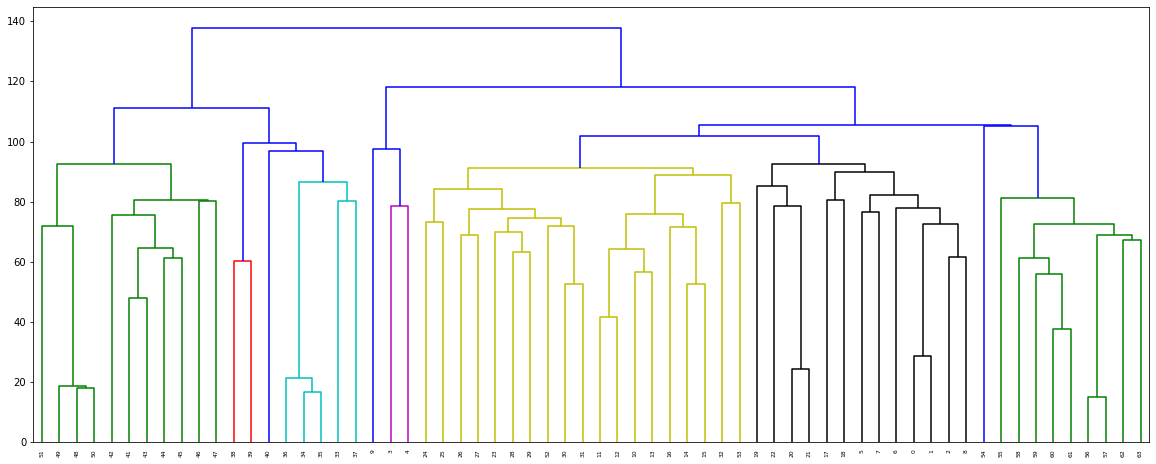

In [54]:
plt.figure(figsize=(20,8))
dendrogram(mergings)
plt.show()

In [55]:
labels_pca = fcluster(mergings, 130, criterion='distance')
labels_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [56]:
data_pca['hc_clusters_pca'] = labels_pca
data_pca['hc_clusters'] = labels
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,hc_clusters_pca,hc_clusters
0,-19.798005,-0.116787,5.968825,4.753230,4.884083,18.920461,-13.224784,18.039055,-18.625299,-7.342936,...,2.448481,-2.059202,-1.947639,1.616418,-0.715691,-1.448058,3.720702,5.179350,2,2
1,-21.548412,1.455699,9.019456,6.767933,2.249123,17.067269,-13.029961,21.326749,-22.115048,-15.272546,...,-2.369233,2.425393,2.986512,2.795536,-4.392258,-5.969054,-3.750232,1.274778,2,2
2,-25.057486,-1.528649,6.959444,2.785831,10.822850,16.452682,-5.278968,1.430540,-5.708826,0.376291,...,-12.624260,7.485643,-8.116554,-10.800123,-1.686207,16.811912,2.951217,-6.623304,2,2
3,-37.409232,11.384816,5.406614,15.441905,16.018423,33.096293,-4.558469,0.873979,4.985925,-3.653884,...,11.031067,8.291689,1.474391,0.429602,-5.096672,-2.935138,-4.822112,-9.712493,2,2
4,-50.215514,1.339652,17.599353,15.099646,13.859899,16.951757,-11.521133,-22.154691,18.938059,7.634024,...,-3.133820,-10.431895,2.884919,-0.499623,-3.475395,-1.588469,-1.286527,5.138862,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-15.452064,44.163262,-14.930986,-8.057833,-1.593985,-5.827618,3.386073,-0.218199,18.538179,-4.818899,...,-9.598026,-7.199133,5.318286,-9.416101,5.268683,-6.690508,-2.241001,-8.228672,2,2
60,-1.932687,35.329293,-11.411210,-0.207917,2.191313,-4.189731,0.892521,3.653827,11.909286,-0.509146,...,-5.188060,5.391362,5.064680,1.698977,-1.656633,5.961766,-6.231294,1.974520,2,2
61,-14.364834,33.290529,-14.764469,-0.384617,2.374498,-1.012552,-0.200301,0.338852,6.864700,1.359126,...,1.653075,1.762534,0.094780,8.079644,-3.438954,2.601021,-6.040832,-2.074023,2,2
62,-12.746465,45.221854,-10.155391,-1.058811,2.444453,-1.840432,-2.147376,-0.761868,4.249002,5.065255,...,-4.444481,4.286816,-8.680445,5.758039,-0.104257,-0.737336,2.508158,-1.436825,2,2


# Compairing the clusterds

In [57]:
# Create dataframe

df = pd.DataFrame(data_pca,columns=['hc_clusters','hc_clusters_pca'])
df


,hc_clusters,hc_clusters_pca
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
59,2,2
60,2,2
61,2,2
62,2,2


In [ ]:
# when we take n_components=50 while applying PCA there is no difference in clusters before and after perfoming PCA. But if we take n_components=10, there is a significant difference in clusters. 